In [1]:
import numpy as np

In [6]:
N = 100
t = 5

arrival_times = (N * t *np.sort(np.random.rand(N))).astype(int)
diff_arrival = np.diff(arrival_times)
diff_arrival[:10]

array([7, 6, 1, 1, 2, 8, 3, 5, 1, 2])

In [7]:
np.mean(diff_arrival)

4.97979797979798

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

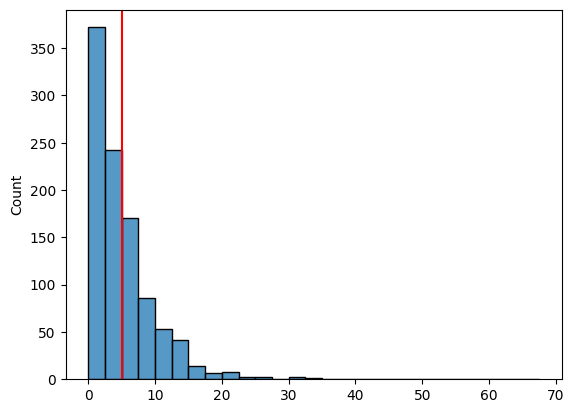

In [10]:
# сделаем функцию и посмотрим как у нас меняется среднее
t = 5

def get_samples(size):
    arrival_times = ((size + 1) * t *np.sort(np.random.rand(size + 1)))
    return np.diff(arrival_times)

data = get_samples(1000)
sns.histplot(data, bins=np.arange(0, 70, 2.5))
plt.axvline(x = np.mean(data), color = "red")

In [11]:
# 1000 раз сгенерируем выборку и посмотрим распределение среднего
means = []
size = 1000
n_iter = 1000

for _ in range(n_iter):
    samples = get_samples(size = size)
    mean = np.mean(samples)
    means.append(mean)

<AxesSubplot: ylabel='Count'>

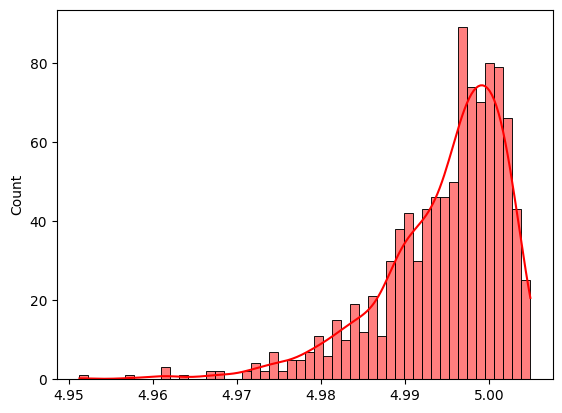

In [13]:
sns.histplot(means, bins = 50, kde=True, color = "red", alpha=0.5)

In [14]:
# сгенерим ГС, затем 1000 бутстрапируем
size = 1000
data = get_samples(size)

In [15]:
means = []
n_iter = 1000

for _ in range(n_iter):
    samples = np.random.choice(data, size = size, replace=True) #replace True - данные с возвращеним берём
    mean = np.mean(samples)
    means.append(mean)

<AxesSubplot: ylabel='Count'>

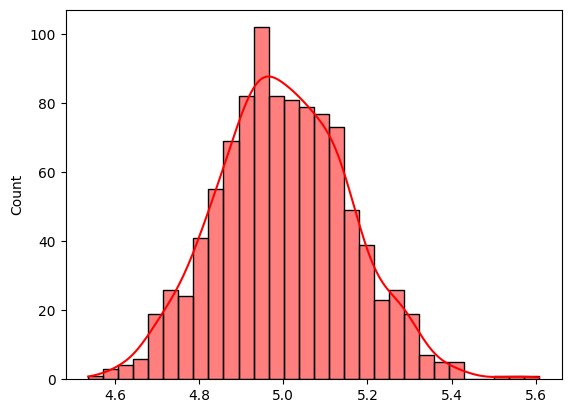

In [17]:
sns.histplot(means, bins = 30, kde=True, color = "red", alpha=0.5)

In [20]:
q = np.quantile(means, q = 0.05)

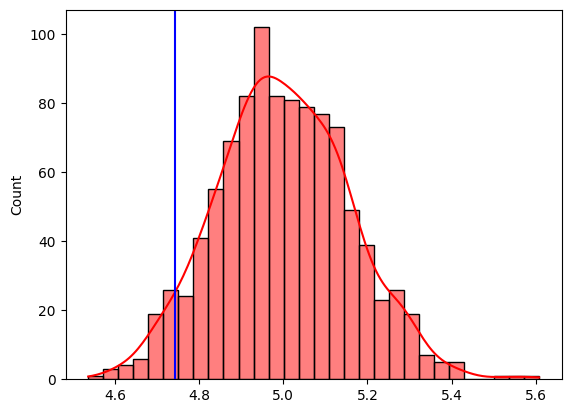

In [21]:
sns.histplot(means, bins = 30, kde=True, color = "red", alpha=0.5)
plt.axvline(x=q, color="blue")
plt.show()

In [22]:
#чтобы построить доверительный интервал с уровнем доверия 95% отрежем с каждой стороны 0.025
alpha = 0.05
ci = np.quantile(means, q=[0.025, 0.975])

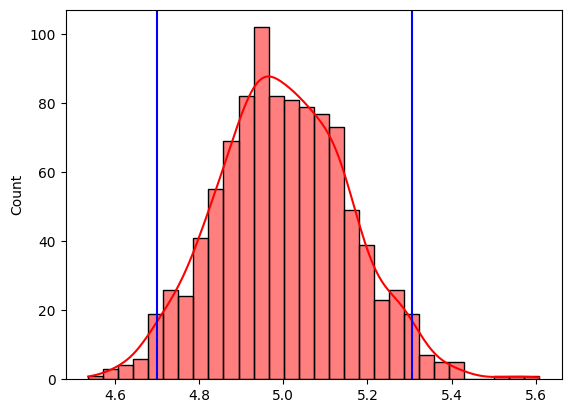

In [23]:
sns.histplot(means, bins = 30, kde=True, color = "red", alpha=0.5)
plt.axvline(x=ci[0], color="blue")
plt.axvline(x=ci[1], color="blue")
plt.show()

In [24]:
from scipy.stats import bootstrap
bootstrap(
    data=(data,),
    statistic=np.mean,
    confidence_level=0.95,
    n_resamples=1000,
    method='percentile',
).confidence_interval

ConfidenceInterval(low=4.693806734145976, high=5.325908865838427)

In [3]:
#Проведём эксперимент, теперь будем вычислять сумму значений нормальной выборки
sums = []
size = 100
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.normal(loc=5, scale=2, size=size)
    sum_ = np.sum(samples)
    sums.append(sum_)

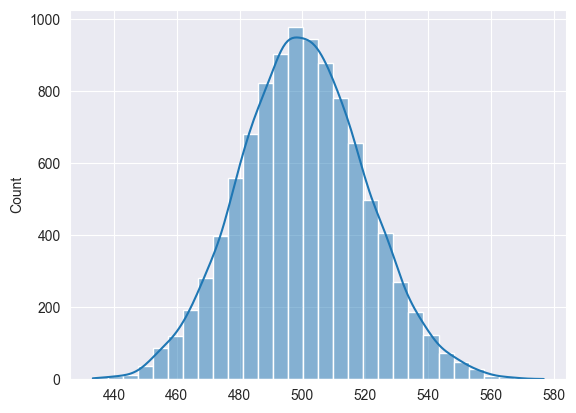

In [4]:
sns.histplot(sums, bins = 30, kde=True)
plt.show()

In [5]:
#Хммм, интересно, получили нормальное распределение, я понимаю что это подводочка к ЦПТ

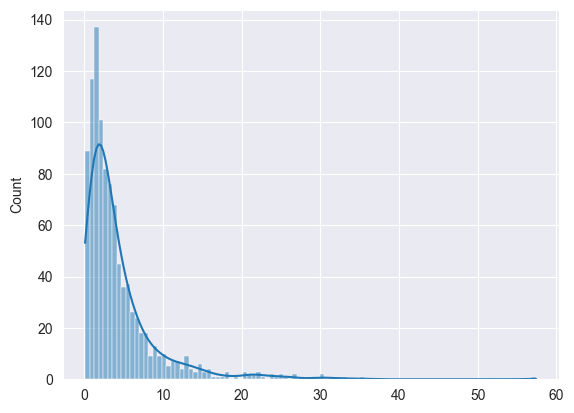

In [6]:
#Теперь возьмем логнормальное распределение
size = 1000
samples = np.random.lognormal(mean=1, sigma=1, size=size)

sns.histplot(samples, bins = 100, kde=True)
plt.show()

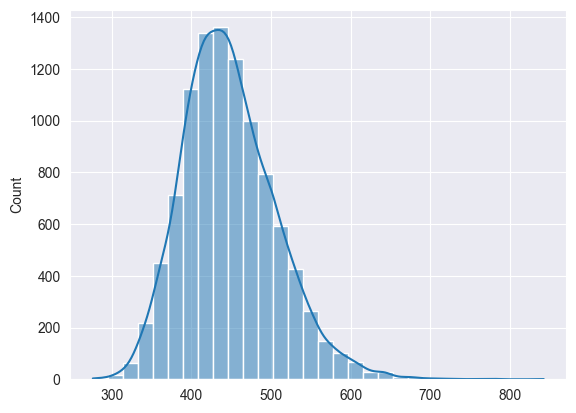

In [9]:
#ну и проделаем тоже самое, возьмём суммы
sums = []
size = 100
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.lognormal(mean=1, sigma=1, size=size)
    sum_ = np.sum(samples)
    sums.append(sum_)
sns.histplot(sums, bins = 30, kde=True)
plt.show()

In [10]:
#Опааа, опять похоже на нормальное распределение


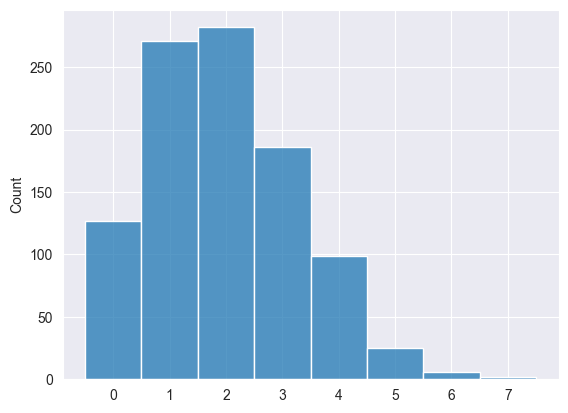

In [11]:
#ХМММ, а тепеНь посмотрим на распределние пуассона
size = 1000
samples = np.random.poisson(lam=2, size=size)

sns.histplot(samples, bins=np.arange(-0.5, 8.5, 1), kde=False)
plt.show()

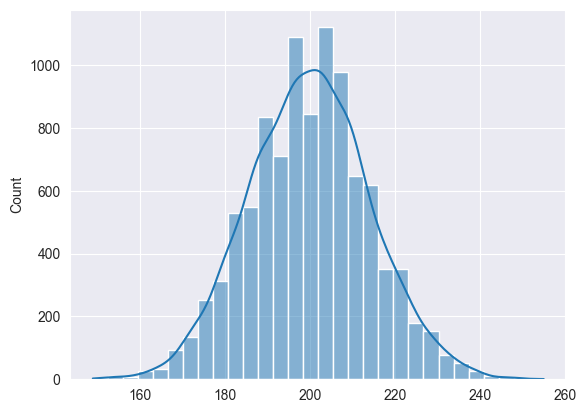

In [12]:
sums = []
size = 100
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.poisson(lam=2, size=size)
    sum_ = np.sum(samples)
    sums.append(sum_)
sns.histplot(sums, bins = 30, kde=True)
plt.show()

In [ ]:
#И опять мы получаем нормальное распределение

In [13]:
#Посчитаем квантили нормального распределения
from scipy.stats import norm
norm().ppf(q=0.001)

-3.090232306167813

In [14]:
norm().ppf(q=0.025)

-1.9599639845400545

In [15]:
norm().ppf(q=0.15)

-1.0364333894937898